# Pump and Treat - Well System Model

![River Base Concept Model](river_and_wells.svg)

# Example description
### Spatial configuration
There is two simulated aquifer which are separated by an aquitard. The model grid consists of 15 rows, 10 columns, and 3 layers.  Uniform grid spacing with a row and column width of 100.0 meters. The top layer is positioned at an elevation of 15.0 meters, while the bottom layers are situated at elevations of -5.0, -10.0, and -15.0 meters, respectively.
### Temporal discretization
The model is designed for a simulation period of 10 days, divided into 120 time steps per stress period, with a time step multiplier of 1.0. The simulation is repeated for a total of 3 periods. The model operates in days as time units and meters as length units.
### Layer Hydraulic properties 
Initial hydraulic conductivity values for the three layers are set at 0.5, 0.000006, and 0.5, respectively.
The vertical anisotropy ratios for the layers are specified as 0.1, 0.2, and 0.3, indicating differences in hydraulic conductivity in the vertical direction.
### Storage properties 
The specific yield is set at 0.2, representing the volumetric ratio of water that drains under the influence of gravity.The specific storage is specified as 0.000001, representing the compressibility of the aquifer.
### Boundary Conditions 
The model starts with an initial hydraulic head of 10.0 meters across the entire domain. 
Two constant head boundaries are established at specific locations: one at the intersection of the first layer, first row, and first column and another at the intersection of the last layer, last row, and last column, each set at a constant head of 10.0 meters.
### Solute transport conditions 
The initial concentration of the substance being transported within the groundwater system set to 1.
The model simulates a point source contamination: at cell (Layer 0, Row 5, Column 1), the initial concentration is set to 10.
Similarly, at cell (Layer 0, Row 6, Column 1), the initial concentration is also set to 10.
### Well Boundary Conditions 
The 3 wells are located at (0, 4, 4), (0, 6, 4) and (0, 8,4); and all wells only reaching the first layer (=0). 
Discharge or pumping rates associated with the wells are -0.05 (m/d) on the first time-period, -0.5 for the second and -0.05 for the third.

# Start setting up the model 

### Magic commands - auto reload of the model each time 

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

### Import from pymf6tools the functions to run, get and visualize simulation results

In [5]:
from pathlib import Path 
from pymf6.mf6 import MF6
import pandas as pd 
from functools import partial 
import numpy as np 

from pymf6_tools.make_model import run_simulation, get_simulation


from pymf6_tools.base_model import make_model_data
from pymf6_tools.make_model import make_input, run_simulation, get_simulation
from pymf6_tools.plotting import show_heads, show_well_head, show_bcs

In [6]:
from pymf6_tools.plotting import show_heads, show_well_head, show_concentration, show_bcs, show_bot_elevations, show_river_stages, contour_bot_elevations, plot_spec_discharge 

## Set model path and name 

In [7]:
model_path = r'models/pumptreat'
model_name = 'pumptreat'

## Run simulation - Uncontrolled

In [8]:
run_simulation(model_path, verbosity_level=1)

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package npf...
    loading package sto...
    loading package chd...
    loading package wel...
    loading package oc...
  loading model gwt6...
    loading package dis...
    loading package ic...
    loading package adv...
    loading package dsp...
    loading package mst...
    loading package ssm...
    loading package cnc...
    loading package oc...
  loading exchange package gwf-gwt_exg_0...
  loading solution package pumptreat...
  loading solution package gwt_pumptreat...
FloPy is using the following executable to run the model: ..\..\..\..\..\..\mf6.6.2_win64\bin\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.6.2 05/12/2025

   MODFLOW 6 compiled May 12 2025 12:42:18 with Intel(R) Fortran Intel(R) 64

In [9]:
run_simulation?

Signature: run_simulation(model_path, verbosity_level=0)
Docstring: Run a MODFLOW 6 model.
File:      c:\users\lucialabarca\re-run noteboks\pymf6-validation\.pixi\envs\default\lib\site-packages\pymf6_tools\make_model.py
Type:      function

## Inspect model parameters 

In [10]:
sim = get_simulation(model_path, model_name)
ml = sim.get_model('gwf_' + model_name)
dis = ml.get_package('dis') 

AttributeError: 'NoneType' object has no attribute 'get_package'

In [11]:
dis.data_list

NameError: name 'dis' is not defined

## Visualization of Input and Output - e.g. Boundary conditions and Heads 

### Plot Boundary conditions 

### Boundary Conditions 
Note that you should change the "bc_names" according to the boundary conditions present in the simulation.  
<span style="color:blue">'chd'</span> Constant-head boundary  
<span style="color:blue">'wel'</span> River boundary

In [12]:
show_bcs?

Signature:
show_bcs(
    model_path,
    name,
    title='Boundary Conditions',
    bc_names=('chd', 'wel', 'riv'),
    show_grid=True,
)
Docstring: Show location of boundary conditions.
File:      c:\users\lucialabarca\re-run noteboks\pymf6-validation\.pixi\envs\default\lib\site-packages\pymf6_tools\plotting.py
Type:      function

In [13]:
show_bcs(model_path, model_name, bc_names=('chd','wel'))

AssertionError: A model grid instance must be provided to PlotMapView

### Specific Discharge - Interactive graph (layer and time)
Specify the layer and time of the simulation to be visualized.

In [14]:
plot_spec_discharge(model_path, model_name, layer=1, times = 300)

AttributeError: 'NoneType' object has no attribute 'output'

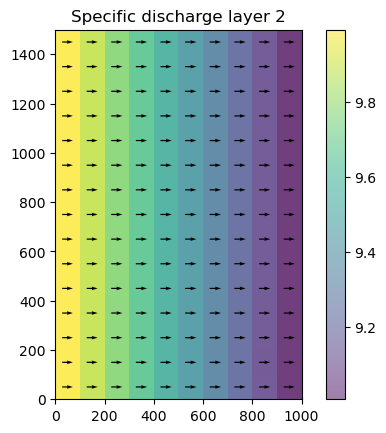

In [12]:
plot_spec_discharge(model_path, model_name, layer=2, times = 300)

### Groundwater level 

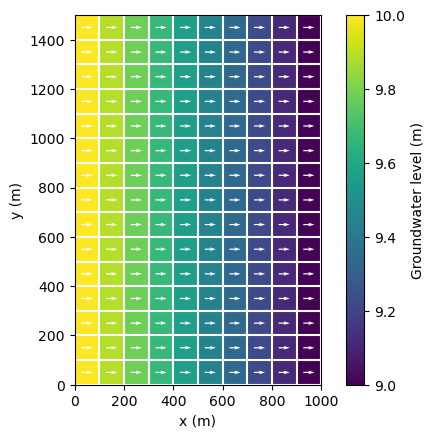

In [13]:
show_heads(model_path, model_name, show_wells=False)

### Visualize contamination plume

### Concentration

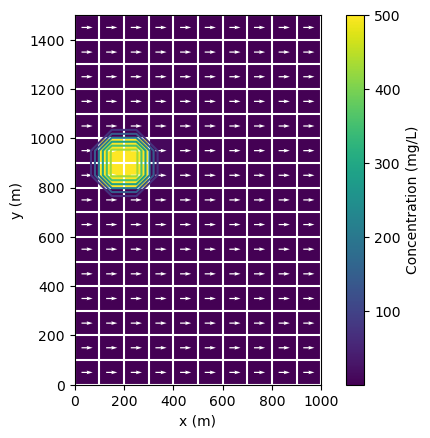

In [22]:
show_concentration(model_path, model_name, show_wells=False, show_arrows=True, show_rivers=False)

### Well head 

<Axes: xlabel='Time (d)', ylabel='Groundwater level (m)'>

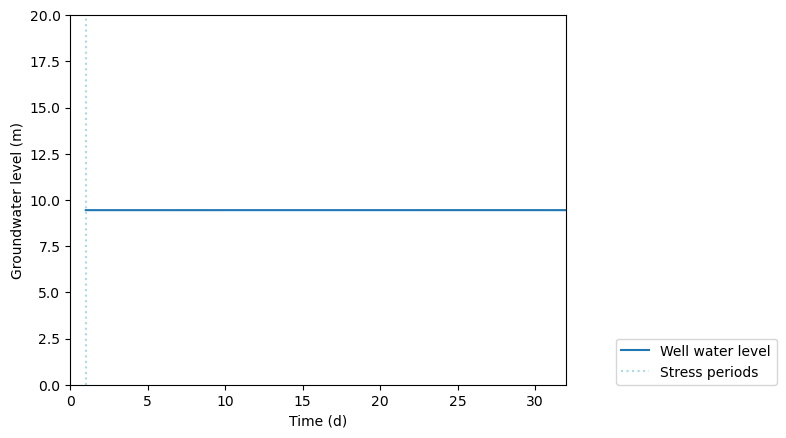

In [16]:
show_well_head((1, 5, 5), model_path, model_name, times=[1], y_start=0, y_end=20)

## pmyf6 dynamic control 

### Controlled case 

The technical objective is to dynamically regulate the pumping rates of these wells during the simulation based on two key thresholds: the daily treatment capacity (i.e., a maximum allowable extracted volume) and the contaminant concentrations at the municipal boundary, in order to maintain water quality the aquifer located at the protected area. The contamination source was implemented using the Initial Conditions (IC) package, with initial concentration of 10.0 defined at two grid cells: (1, 6, 2) and (1, 7, 2). To track contaminant migration and evaluate the performance of the hydraulic barrier, an observation well was installed on the eastern (right) side of the model at the municipal boundary, at coordinates (1, 6, 7). The extraction wells that form the hydraulic barrier are located at (1, 5, 5), (1, 7, 5), and (1, 9, 5), strategically positioned between the contamination source  and area we want to protect. 

### Inspect visualization tools

In [17]:
show_bcs?

Signature:
show_bcs(
    model_path,
    name,
    title='Boundary Conditions',
    bc_names=('chd', 'wel', 'riv'),
    show_grid=True,
)
Docstring: Show location of boundary conditions.
File:      c:\users\lucialabarca\re-run noteboks\pymf6-validation\.pixi\envs\default\lib\site-packages\pymf6_tools\plotting.py
Type:      function

### Inspect the parameters by importing the model results 

In [18]:
model_path = r'models/transbase'
model_name = 'transbase'

In [19]:
from pymf6.mf6 import MF6

In [ ]:
mf6 = MF6(model_path)

In [ ]:
mf6.models.keys()

In [ ]:
gwf_models = mf6.models['gwf6']

In [ ]:
gwf_models.keys()

In [ ]:
gwt_models = mf6.models['gwt6']

In [ ]:
gwt_models.keys()

### Inspect model packages 

In [ ]:
gwt = gwt_models['gwt_transbase']

In [ ]:
gwf = gwf_models['gwf_transbase']

In [ ]:
gwf.packages

In [ ]:
gwt.packages

### Inspect well package 

In [ ]:
 for _ in mf6.model_loop():
        if gwf.kper > 0: # break after
            break

In [ ]:
wel = gwf.packages.get_package('wel-1').as_mutable_bc()

In [ ]:
wel.nodelist[:]

### Inspect values at any node

In [ ]:
initial_head = gwf.X[(1, 6, 7)]
initial_head

### Forward it to next time-step 2

In [ ]:
for _ in mf6.model_loop():
        if gwf.kper > 1: # break after
            break

### Concentration at sources

In [ ]:
conc = gwt.X[(1, 7, 2)]
conc

In [ ]:
conc = gwt.X[(1, 6, 2)]
conc

In [ ]:
conc = gwt.X[(1, 6, 3)]
conc

In [ ]:
conc = gwt.X[(1, 6, 3)]
conc

### concentration at observation well 

In [ ]:
conc = gwt.X[(1, 6, 7)]
conc

### 

In [ ]:
for _ in mf6.model_loop():
        if gwf.kper > 2: # break after
            break

### Controlled Well Head 

### Run the control script 